<a href="https://colab.research.google.com/github/lin3372/600_graph_neural_net/blob/main/books/Graph_Machine_Learning/01_01_Intro_Networkx.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Plot Graphs

In [ ]:
def draw_graph(G, pos_nodes, node_names={}, node_size=50, plot_weight=False):
    nx.draw(G, pos_nodes, with_labels=False, node_size=node_size, edge_color='red', arrowsize=30, node_color='green', alpha=0.5)
    # orig: nx.draw(G, pos_nodes, with_labels=False, node_size=node_size, edge_color='gray', arrowsize=30)
    
    pos_attrs = {}
    for node, coords in pos_nodes.items():
        pos_attrs[node] = (coords[0], coords[1] + 0.08)
        
    nx.draw_networkx_labels(G, pos_attrs, font_family='serif', font_size=16)
    
    
    if plot_weight:
        pos_attrs = {}
        for node, coords in pos_nodes.items():
            pos_attrs[node] = (coords[0], coords[1] + 0.08)
        
        nx.draw_networkx_labels(G, pos_attrs, font_family='serif', font_size=12)
        edge_labels=dict([((a,b,),d["weight"]) for a,b,d in G.edges(data=True)])
        nx.draw_networkx_edge_labels(G, pos_nodes, edge_labels=edge_labels)
    
    plt.axis('off')
    axis = plt.gca()
    axis.set_xlim([1.2*x for x in axis.get_xlim()])
    axis.set_ylim([1.2*y for y in axis.get_ylim()])

In [ ]:
import numpy as np
import pandas as pd
import networkx as nx
import matplotlib.pyplot as plt

## Undirected Graph

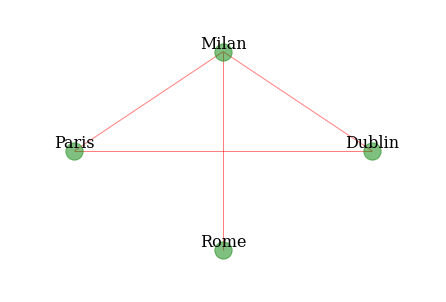

In [ ]:
import numpy as np
import pandas as pd
import networkx as nx
import matplotlib.pyplot as plt

G = nx.Graph()
V = {'Dublin', 'Paris', 'Milan', 'Rome'}
E = [('Milan','Dublin'), ('Milan','Paris'), ('Paris','Dublin'), ('Milan','Rome')]
G.add_nodes_from(V)
G.add_edges_from(E)
draw_graph(G, pos_nodes=nx.shell_layout(G), node_size=300)

In [ ]:
print(f"V = {G.nodes}")
print(f"E = {G.edges}")

V = ['Paris', 'Rome', 'Dublin', 'Milan']
E = [('Paris', 'Milan'), ('Paris', 'Dublin'), ('Rome', 'Milan'), ('Dublin', 'Milan')]


In [ ]:
{G.degree(v): v for v in G.nodes}

{1: 'Rome', 2: 'Dublin', 3: 'Milan'}

### Graph order and Graph size

In [ ]:
print(f"Graph Order: {G.number_of_nodes()}")
print(f"Graph Size: {G.number_of_edges()}")
print(f"Degree for nodes: { {v: G.degree(v) for v in G.nodes} }")
print(f"Neighbors for nodes: { {v: list(G.neighbors(v)) for v in G.nodes} }")

Graph Order: 4
Graph Size: 4
Degree for nodes: {'Paris': 2, 'Rome': 1, 'Dublin': 2, 'Milan': 3}
Neighbors for nodes: {'Paris': ['Milan', 'Dublin'], 'Rome': ['Milan'], 'Dublin': ['Milan', 'Paris'], 'Milan': ['Dublin', 'Paris', 'Rome']}


###Neighborhood Graph (ego graph)

In [ ]:
ego_graph_milan = nx.ego_graph(G, "Milan")
print(f"Nodes: {ego_graph_milan.nodes}")
print(f"Edges: {ego_graph_milan.edges}")

Nodes: ['Paris', 'Rome', 'Dublin', 'Milan']
Edges: [('Paris', 'Milan'), ('Paris', 'Dublin'), ('Rome', 'Milan'), ('Dublin', 'Milan')]


### Adding nodes and edges

In [ ]:
new_nodes = {'London', 'Madrid'}
new_edges = [('London','Rome'), ('Madrid','Paris')]
G.add_nodes_from(new_nodes)
G.add_edges_from(new_edges)
print(f"V = {G.nodes}")
print(f"E = {G.edges}")

V = ['Paris', 'Rome', 'Dublin', 'Milan', 'London', 'Madrid']
E = [('Paris', 'Milan'), ('Paris', 'Dublin'), ('Paris', 'Madrid'), ('Rome', 'Milan'), ('Rome', 'London'), ('Dublin', 'Milan')]


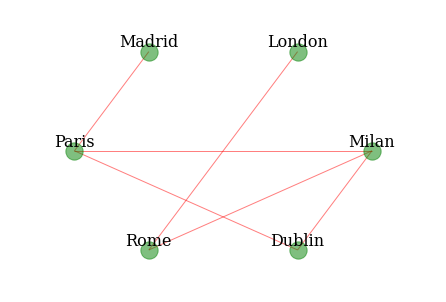

In [ ]:
draw_graph(G, pos_nodes=nx.shell_layout(G), node_size=300)

### Removing nodes and edges

In [ ]:
node_remove = {'London', 'Madrid'}
node_edges = {}
G.remove_nodes_from(node_remove)
print(f"V = {G.nodes}")
print(f"E = {G.edges}")

V = ['Paris', 'Rome', 'Dublin', 'Milan']
E = [('Paris', 'Milan'), ('Paris', 'Dublin'), ('Rome', 'Milan'), ('Dublin', 'Milan')]


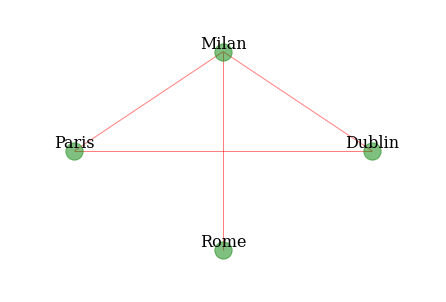

In [ ]:
G.remove_edges_from(node_edges)
draw_graph(G, pos_nodes=nx.shell_layout(G), node_size=300)

In [ ]:
node_edges = [('Milan','Dublin'), ('Milan','Paris')]
print(f"V = {G.nodes}")
print(f"E = {G.edges}")

V = ['Paris', 'Rome', 'Dublin', 'Milan']
E = [('Paris', 'Milan'), ('Paris', 'Dublin'), ('Rome', 'Milan'), ('Dublin', 'Milan')]


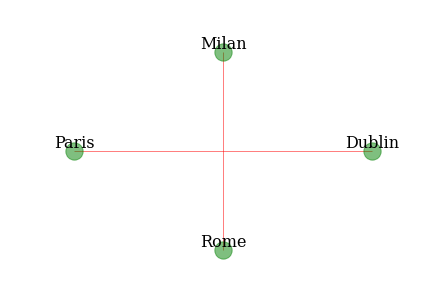

In [ ]:
G.remove_edges_from(node_edges)
draw_graph(G, pos_nodes=nx.shell_layout(G), node_size=300)

In [ ]:
print(nx.to_edgelist(G))

[('Paris', 'Dublin', {}), ('Rome', 'Milan', {})]


### adjacency matrix for G

In [ ]:
print(nx.to_pandas_adjacency(G))

        Paris  Rome  Dublin  Milan
Paris     0.0   0.0     1.0    0.0
Rome      0.0   0.0     0.0    1.0
Dublin    1.0   0.0     0.0    0.0
Milan     0.0   1.0     0.0    0.0


## Directed Graph

In [ ]:
import networkx as nx
G = nx.DiGraph() # directed graph
V = {'Dublin', 'Paris', 'Milan', 'Rome'}
E = [('Milan','Dublin'), ('Paris','Milan'), ('Paris','Dublin'), ('Milan','Rome'), ('Rome', 'Milan')]
G.add_nodes_from(V)
G.add_edges_from(E)
print(nx.to_pandas_edgelist(G))
print(nx.to_pandas_adjacency(G))

  source  target
0  Paris   Milan
1  Paris  Dublin
2   Rome   Milan
3  Milan  Dublin
4  Milan    Rome
        Paris  Rome  Dublin  Milan
Paris     0.0   0.0     1.0    1.0
Rome      0.0   0.0     0.0    1.0
Dublin    0.0   0.0     0.0    0.0
Milan     0.0   1.0     1.0    0.0


In [ ]:
print(f"Indegree for nodes: { {v: G.in_degree(v) for v in G.nodes} }")
print(f"Outegree for nodes: { {v: G.out_degree(v) for v in G.nodes} }")

Indegree for nodes: {'Paris': 0, 'Rome': 1, 'Dublin': 2, 'Milan': 2}
Outegree for nodes: {'Paris': 2, 'Rome': 1, 'Dublin': 0, 'Milan': 2}


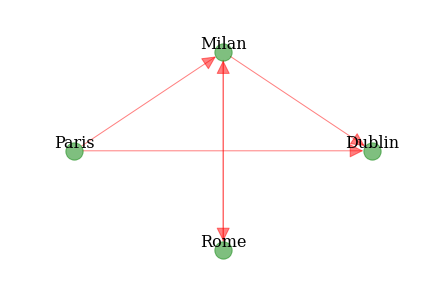

In [ ]:
draw_graph(G, pos_nodes=nx.shell_layout(G), node_size=300)

## Weighted Directed Graph

  source  target  weight
0  Paris  Dublin      11
1  Paris   Milan       8
2  Milan    Rome       5
3  Milan  Dublin      19
        Paris  Rome  Dublin  Milan
Paris     0.0   0.0    11.0    8.0
Rome      0.0   0.0     0.0    0.0
Dublin    0.0   0.0     0.0    0.0
Milan     0.0   5.0    19.0    0.0


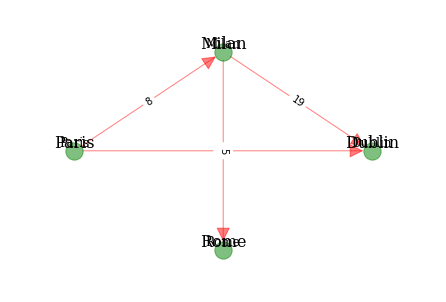

In [ ]:
import networkx as nx
G = nx.MultiDiGraph()
V = {'Paris', 'Dublin','Milan', 'Rome'}
E = [ ('Paris','Dublin', 11), ('Paris','Milan', 8),
     ('Milan','Rome', 5),('Milan','Dublin', 19)]
G.add_nodes_from(V)
G.add_weighted_edges_from(E)
draw_graph(G, pos_nodes=nx.shell_layout(G), node_size=300, plot_weight=True)
print(nx.to_pandas_edgelist(G))
print(nx.to_pandas_adjacency(G))


we can imagine the edge weight as a "cost" to reach a node from another node. 
For example, reaching **Dublin** from **Milan** has a "***cost***" of 19, while reaching **Dublin** from **Paris** has a "***cost***" of 11

## Bipartite Graph

In [ ]:
n_nodes = 10
n_edges = 12
bottom_nodes = [ith for ith in range(n_nodes) if ith % 2 ==0]
top_nodes = [ith for ith in range(n_nodes) if ith % 2 ==1]
rnd_nodes_bot = np.random.choice(bottom_nodes, n_edges)
rnd_nodes_top = np.random.choice(top_nodes, n_edges)

iter_edges = zip(rnd_nodes_bot, rnd_nodes_top)
#    np.random.choice(bottom_nodes, n_edges),  
#    np.random.choice(top_nodes, n_edges))

print(f"iter_edges:{list(zip(rnd_nodes_bot, rnd_nodes_top))}")
edges = pd.DataFrame([
    {"source": a, "target": b} for a, b in iter_edges])

print(f"edges:{list(edges)}")

B = nx.Graph()
B.add_nodes_from(bottom_nodes, bipartite=0)
B.add_nodes_from(top_nodes, bipartite=1)
B.add_edges_from([tuple(x) for x in edges.values])

iter_edges:[(8, 7), (8, 1), (6, 7), (8, 7), (4, 9), (8, 1), (4, 5), (6, 5), (8, 7), (4, 3), (4, 1), (6, 7)]
edges:['source', 'target']


Ref - [np.random.choice和random.choice的用法](https://blog.csdn.net/haha0332/article/details/115518985), [numpy.random.choice() in Python](https://www.geeksforgeeks.org/numpy-random-choice-in-python/)

Ref - [Using the Python zip() Function for Parallel Iteration](https://realpython.com/python-zip-function/)

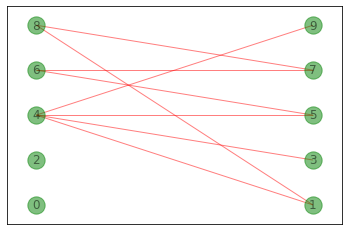

In [ ]:
from networkx.drawing.layout import bipartite_layout
pos = bipartite_layout(B, bottom_nodes)
nx.draw_networkx(B, pos=pos, node_color='green', alpha=0.5, edge_color='red')

## Multi Graph

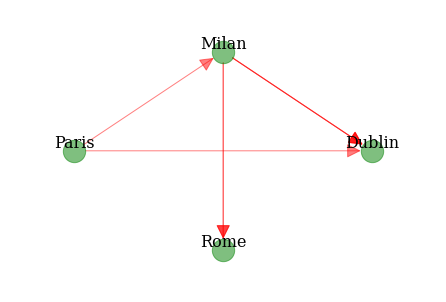

In [ ]:
import networkx as nx
directed_multi_graph = nx.MultiDiGraph()
V = {'Dublin', 'Paris', 'Milan', 'Rome'}
E = [('Milan','Dublin'), ('Milan','Dublin'), ('Paris','Milan'), ('Paris','Dublin'), ('Milan','Rome'), ('Milan','Rome'), ('Milan','Dublin')]
directed_multi_graph.add_nodes_from(V)
directed_multi_graph.add_edges_from(E)

G=directed_multi_graph
draw_graph(G, pos_nodes=nx.shell_layout(G), node_size=500)
#G=directed_multi_graph
#draw_graph(directed_multi_graph, pos_nodes=nx.shell_layout(directed_multi_graph), node_size=500)


In [ ]:
print(nx.to_pandas_edgelist(G))
print()
print(nx.to_pandas_adjacency(G))
print()
print(f"to_matrix:\n{nx.to_numpy_matrix(G)}") #adjacency matrix as numpy matrix
print(f"to_array:\n{nx.to_numpy_array(G)}")
print(f"dict_2_dict:\n{nx.to_dict_of_dicts(G)}")

  source  target
0  Paris   Milan
1  Paris  Dublin
2  Milan  Dublin
3  Milan  Dublin
4  Milan  Dublin
5  Milan    Rome
6  Milan    Rome

        Paris  Rome  Dublin  Milan
Paris     0.0   0.0     1.0    1.0
Rome      0.0   0.0     0.0    0.0
Dublin    0.0   0.0     0.0    0.0
Milan     0.0   2.0     3.0    0.0

to_matrix:
[[0. 0. 1. 1.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 2. 3. 0.]]
to_array:
[[0. 0. 1. 1.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 2. 3. 0.]]
dict_2_dict:
{'Paris': {'Milan': {0: {}}, 'Dublin': {0: {}}}, 'Rome': {}, 'Dublin': {}, 'Milan': {'Dublin': {0: {}, 1: {}, 2: {}}, 'Rome': {0: {}, 1: {}}}}


## Graph Drawing

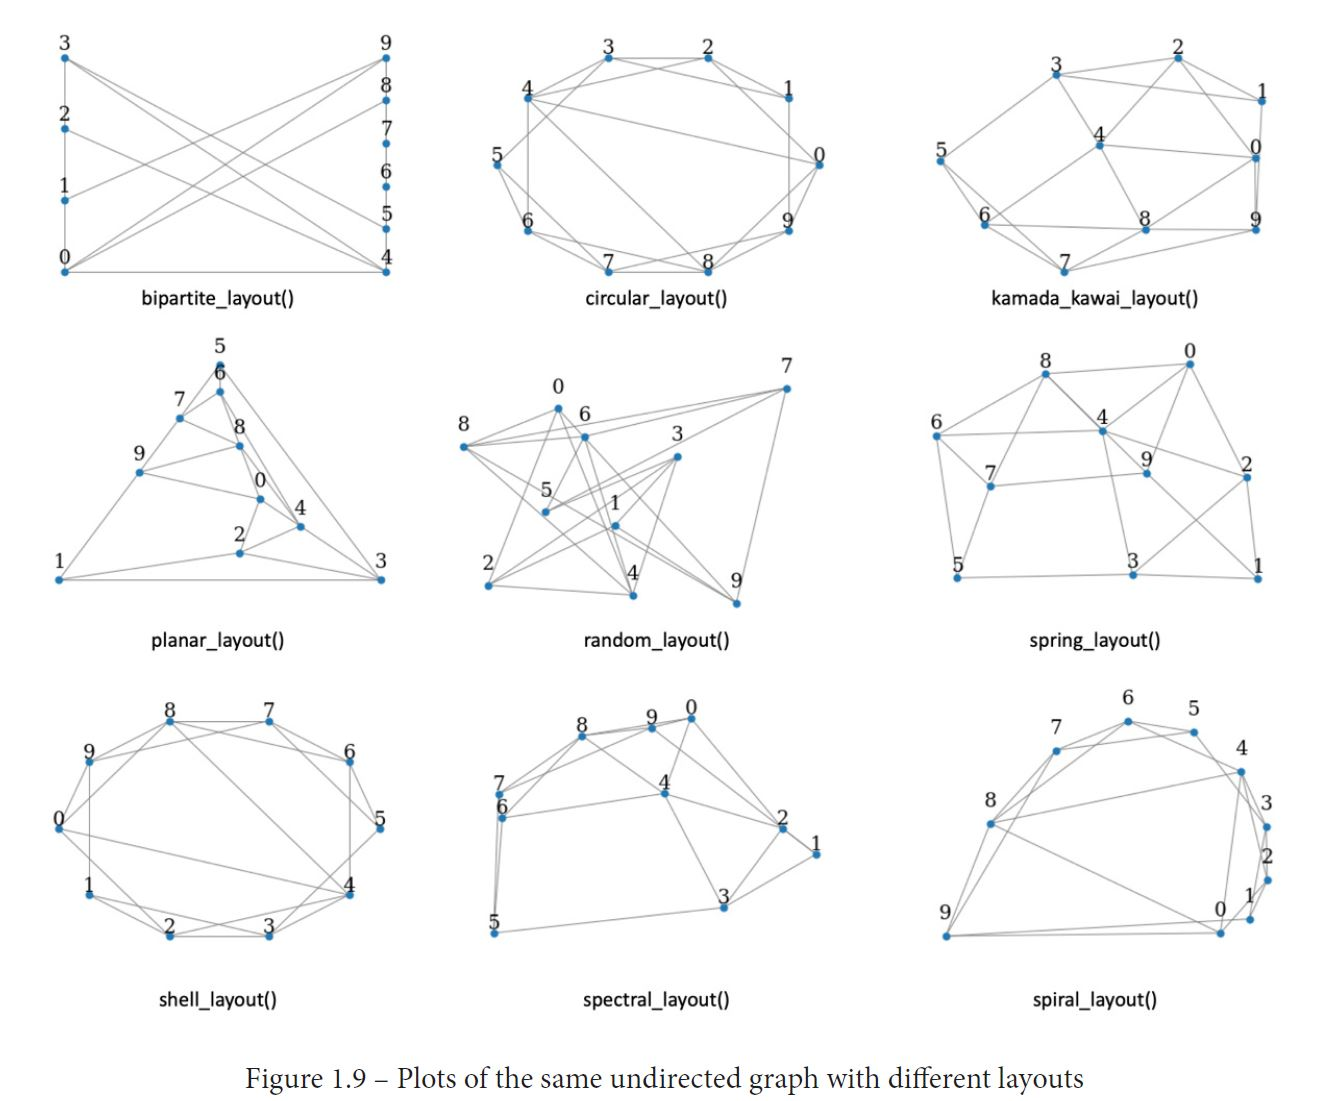

### Simple Graph Drawing
For more details goes to the ipynb for Gaaph drawing (01.01.2)

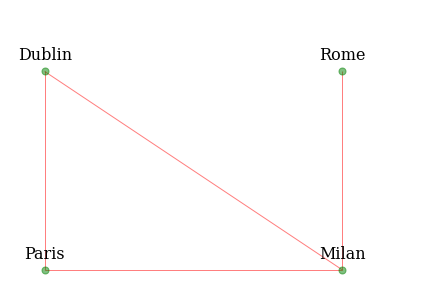

In [ ]:
G = nx.Graph()
V = {'Paris', 'Dublin','Milan', 'Rome'}
E = [('Paris','Dublin', 11), ('Paris','Milan', 8), ('Milan','Rome', 5), ('Milan','Dublin', 19)]
G.add_nodes_from(V)
G.add_weighted_edges_from(E)
node_position = {"Paris": [0,0], "Dublin": [0,1], "Milan":[1,0], "Rome": [1,1]}
draw_graph(G, node_position, True)

### Bipartite Graph

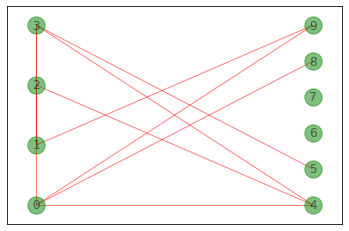

In [ ]:
B = nx.Graph()
nodes_left = {0, 1, 2, 3}
nodes_right = {4, 5, 6, 7, 8, 9}
E1 = [(0,2,2), (0,4,4), (0,8,8), (0,9,9), (1,2,3), (1,3,4), (1,9,10), (2,0,2), (2,1,3), (2,3,5), (2,4,6)]
E2 = [(3,1,4), (3,2,5), (3,4,7), (3,5,8)]
#E = [('Paris','Dublin', 11), ('Paris','Milan', 8), ('Milan','Rome', 5), ('Milan','Dublin', 19)]

B.add_nodes_from(nodes_left, bipartite=0)
B.add_nodes_from(nodes_right, bipartite=1)
B.add_weighted_edges_from(E1)
B.add_weighted_edges_from(E2)

#G.add_nodes_from(V)
#node_position = nx.circular_layout(G)
#draw_graph(G, node_position, True)

#from networkx.drawing.layout import bipartite_layout
pos = bipartite_layout(B, nodes_left)
nx.draw_networkx(B, pos=pos, node_color='green', alpha=0.5, edge_color='red')